# 캐글 코리아와 함께하는 2nd ML 대회 - House Price Prediction

데이터를 분석하고, 모델을 만들어봅시다.

In [1]:
import warnings
warnings.filterwarnings("ignore")

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_path = os.path.dirname(os.path.abspath('__file__'))
data_path += r'/data/kaggle'

train_path = data_path + '/train.csv'
test_path = data_path + '/test.csv'

train = pd.read_csv(train_path)
test = pd.read_csv(test_path)

In [3]:
print(train.shape)
print(test.shape)

(15035, 21)
(6468, 20)


In [4]:
train.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
5,5,20150403T000000,662500.0,3,2.50,3560,9796,1.0,0,0,...,8,1860,1700,1965,0,98007,47.6007,-122.145,2210,8925
6,6,20140527T000000,468000.0,2,1.00,1160,6000,1.0,0,0,...,7,860,300,1942,0,98115,47.6900,-122.292,1330,6000
7,7,20140528T000000,310000.0,3,1.00,1430,19901,1.5,0,0,...,7,1430,0,1927,0,98028,47.7558,-122.229,1780,12697
8,8,20141007T000000,400000.0,3,1.75,1370,9680,1.0,0,0,...,7,1370,0,1977,0,98074,47.6127,-122.045,1370,10208
9,9,20150312T000000,530000.0,5,2.00,1810,4850,1.5,0,0,...,7,1810,0,1900,0,98107,47.6700,-122.394,1360,4850


## 데이터 처리하기

date는 전과 마찬가지로 Int형 데이터로 처리해봅시다.

In [5]:
train['date'] = train['date'].apply(lambda i : i[:6]).astype(int)
train.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,201410,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,201502,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,201502,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,201406,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,201501,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
5,5,201504,662500.0,3,2.50,3560,9796,1.0,0,0,...,8,1860,1700,1965,0,98007,47.6007,-122.145,2210,8925
6,6,201405,468000.0,2,1.00,1160,6000,1.0,0,0,...,7,860,300,1942,0,98115,47.6900,-122.292,1330,6000
7,7,201405,310000.0,3,1.00,1430,19901,1.5,0,0,...,7,1430,0,1927,0,98028,47.7558,-122.229,1780,12697
8,8,201410,400000.0,3,1.75,1370,9680,1.0,0,0,...,7,1370,0,1977,0,98074,47.6127,-122.045,1370,10208
9,9,201503,530000.0,5,2.00,1810,4850,1.5,0,0,...,7,1810,0,1900,0,98107,47.6700,-122.394,1360,4850


타겟 데이터인 price 칼럼은 따로 배줍시다.

In [6]:
y = train['price']
del train['price']

id 칼럼도 삭제해줍시다.

In [7]:
del train['id']

test 데이터에서도 같은 작업을 해줍니다.

In [8]:
test['date'] = test['date'].apply(lambda i : i[:6]).astype(int)

del test['id']

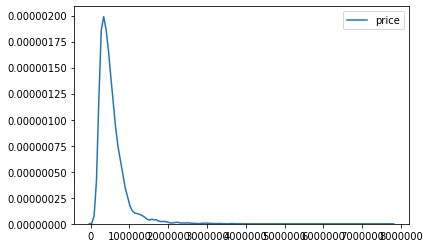

In [9]:
import seaborn as sns

sns.kdeplot(y)

타켓 데이터 y를 로그취해 정규분포로 만들어줍시다.

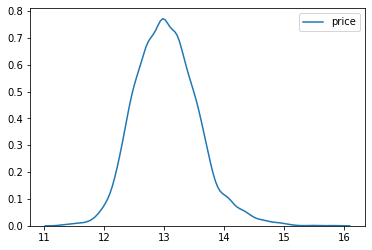

In [10]:
y = np.log1p(y)

sns.kdeplot(y)
plt.show()

### RMSE 계산

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [12]:
def rmse(y_test, y_pred):
    return np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(y_pred)))

In [13]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

In [14]:
# random_state는 모델초기화나 데이터셋 구성에 사용되는 랜덤 시드값입니다. 
#random_state=None    # 이게 초기값입니다. 아무것도 지정하지 않고 None을 넘겨주면 모델 내부에서 임의로 선택합니다.  
random_state=2020        # 하지만 우리는 이렇게 고정값을 세팅해 두겠습니다. 

gboost = GradientBoostingRegressor(random_state=random_state)
xgboost = XGBRegressor(random_state=random_state)
lightgbm = LGBMRegressor(random_state=random_state)
rdforest = RandomForestRegressor(random_state=random_state)

models = [gboost, xgboost, lightgbm, rdforest]

In [15]:
# 모델이 주어지면 rmse를 구하는 함수를 만들어봅시다.
def get_scores(models, train, y):
    df = {}
    
    for model in models:
        model_name = model.__class__.__name__
        
        X_train, X_test, y_train, y_test = train_test_split(
            train, y, random_state=random_state,
            test_size = 0.2
        )
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        df[model_name] = rmse(y_pred, y_test)
        score_df = pd.DataFrame(df, index=['RMSE']).T.sort_values('RMSE', ascending=False)
        
    return score_df

In [16]:
get_scores(models, train, y)

,RMSE
GradientBoostingRegressor,128360.196497
RandomForestRegressor,125576.039323
LGBMRegressor,111920.367359
XGBRegressor,110318.637918


## 하이퍼 파라미터 튜닝하기 - 그리드 탐색

In [17]:
from sklearn.model_selection import GridSearchCV

지난번에는 `n_estimators`와 `max_depth`만 했는데요, 이번에는 다른 인자들도 넣어봅시다.

In [18]:
param_grid = {
    'n_estimators' : [50, 100],
    'max_depth' : [1, 10],
    'learning_rate' : [0.001, 0.01],
}

In [19]:
model = LGBMRegressor(random_state=random_state)

In [20]:
grid_model = GridSearchCV(model, param_grid=param_grid, \
                        scoring='neg_mean_squared_error', \
                        cv=5, verbose=1, n_jobs=5)

grid_model.fit(train, y)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 out of  40 | elapsed:    1.4s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None,
                                     colsample_bytree=1.0,
                                     importance_type='split', learning_rate=0.1,
                                     max_depth=-1, min_child_samples=20,
                                     min_child_weight=0.001, min_split_gain=0.0,
                                     n_estimators=100, n_jobs=-1, num_leaves=31,
                                     objective=None, random_state=2020,
                                     reg_alpha=0.0, reg_lambda=0.0, silent=True,
                                     subsample=1.0, subsample_for_bin=200000,
                                     subsample_freq=0),
             iid='deprecated', n_jobs=5,
             param_grid={'learning_rate': [0.001, 0.01], 'max_depth': [1, 10],
                         'n_estimators': [50, 100]},
             pre_dispatch='2*n_jobs', refit=True, r

In [21]:
params = grid_model.cv_results_['params']
params

[{'learning_rate': 0.001, 'max_depth': 1, 'n_estimators': 50},
 {'learning_rate': 0.001, 'max_depth': 1, 'n_estimators': 100},
 {'learning_rate': 0.001, 'max_depth': 10, 'n_estimators': 50},
 {'learning_rate': 0.001, 'max_depth': 10, 'n_estimators': 100},
 {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 50},
 {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 100},
 {'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 50},
 {'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 100}]

In [22]:
score = grid_model.cv_results_['mean_test_score']
score

array([-0.27000114, -0.26214554, -0.25804683, -0.23940112, -0.20969606,
       -0.16604353, -0.1386431 , -0.08107976])

In [23]:
results = pd.DataFrame(params)
results['score'] = score

results

,learning_rate,max_depth,n_estimators,score
0,0.001,1,50,-0.270001
1,0.001,1,100,-0.262146
2,0.001,10,50,-0.258047
3,0.001,10,100,-0.239401
4,0.010,1,50,-0.209696
5,0.010,1,100,-0.166044
6,0.010,10,50,-0.138643
7,0.010,10,100,-0.081080


In [24]:
results['RMSE'] = np.sqrt(-1 * results['score'])
results

,learning_rate,max_depth,n_estimators,score,RMSE
0,0.001,1,50,-0.270001,0.519616
1,0.001,1,100,-0.262146,0.512002
2,0.001,10,50,-0.258047,0.507983
3,0.001,10,100,-0.239401,0.489286
4,0.010,1,50,-0.209696,0.457926
5,0.010,1,100,-0.166044,0.407484
6,0.010,10,50,-0.138643,0.372348
7,0.010,10,100,-0.081080,0.284745


In [25]:
results = results.rename(columns={'RMSE': 'RMSLE'})
results

,learning_rate,max_depth,n_estimators,score,RMSLE
0,0.001,1,50,-0.270001,0.519616
1,0.001,1,100,-0.262146,0.512002
2,0.001,10,50,-0.258047,0.507983
3,0.001,10,100,-0.239401,0.489286
4,0.010,1,50,-0.209696,0.457926
5,0.010,1,100,-0.166044,0.407484
6,0.010,10,50,-0.138643,0.372348
7,0.010,10,100,-0.081080,0.284745


In [26]:
results.sort_values('RMSLE')

,learning_rate,max_depth,n_estimators,score,RMSLE
7,0.010,10,100,-0.081080,0.284745
6,0.010,10,50,-0.138643,0.372348
5,0.010,1,100,-0.166044,0.407484
4,0.010,1,50,-0.209696,0.457926
3,0.001,10,100,-0.239401,0.489286
2,0.001,10,50,-0.258047,0.507983
1,0.001,1,100,-0.262146,0.512002
0,0.001,1,50,-0.270001,0.519616


`learning_rate=0.01`, `max_depth=10`, `n_estimators=100`일 때 제일 RMSLE 값이 낮네요! 

이렇게 하이퍼 파라미터를 설정하면 되겠습니다.

In [27]:
model = LGBMRegressor(max_depth=10, n_estimators=100, learning_rate = 0.01, random_state=random_state)
model.fit(train, y)
prediction = model.predict(test)
prediction

array([13.07298017, 12.94012417, 13.69348215, ..., 13.0077864 ,
       12.93474474, 13.02093049])

In [28]:
# 로그 취했던 예측값을 원래대로 되돌립시다.
prediction = np.expm1(prediction)
prediction

array([475907.15645808, 416699.9786027 , 885122.21944114, ...,
       445870.64569168, 414464.38341445, 451769.90836099])

# submit하기

이제 만든 prediction 값들을 제출해봅시다.

In [30]:
submission_path = data_path + r'/sample_submission.csv'
submission = pd.read_csv(submission_path)

In [31]:
submission.head()

,id,price
0,15035,100000
1,15036,100000
2,15037,100000
3,15038,100000
4,15039,100000


In [32]:
submission['price'] = prediction
submission.head()

,id,price
0,15035,475907.156458
1,15036,416699.978603
2,15037,885122.219441
3,15038,359983.156406
4,15039,352034.235583


이제 이 데이터를 CSV 파일로 저장해줍시다.

In [33]:
submission_csv_path = data_path + r'/sub.csv'

submission.to_csv(submission_csv_path, index=False)

## Result

![img](./data/result.png)

어째 baseline 따라한 것 보다 점수가 낮습니다... EDA의 필요성!!!